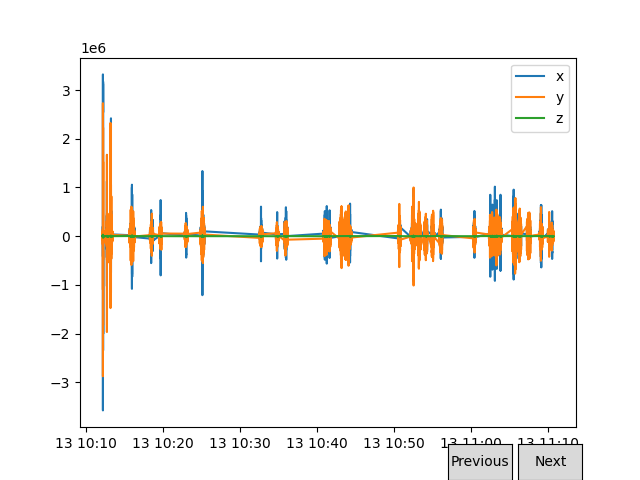

IndexError: list index out of range

IndexError: list index out of range

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import numpy as np
from datetime import datetime
from seismodatareader import SeismodataReader

PERIOD = 3600_000_000

class SeismodataWindow:
    def __init__(self):
        self.__reader = SeismodataReader("seismodata.txt")
        self.timestamps = []
        self.x = []
        self.y = []
        self.z = []

        self.start_time = self.__reader.start_time
        self.end_time = self.start_time + PERIOD
        self.__load_period()
    
    def __load_period(self):
        self.timestamps, self.x, self.y, self.z = self.__reader.get_data(self.start_time, self.end_time)

    def next_period(self, event):
        self.timestamps = []

        while not self.timestamps:
            self.start_time += PERIOD
            self.end_time += PERIOD
            self.__load_period()

    def prev_period(self, event):
        self.timestamps = []
        while not self.timestamps:
            self.start_time -= PERIOD
            self.end_time -= PERIOD
            self.__load_period()


window = SeismodataWindow()

fig, ax = plt.subplots()
x_plt, = ax.plot(window.timestamps, window.x, label="x")
y_plt, = ax.plot(window.timestamps, window.y, label="y")
z_plt, = ax.plot(window.timestamps, window.z, label="z")
ax.legend()

def next_period(event):
    global window, x_plt, y_plt, z_plt
    window.next_period(event)
    x_plt.set_data(window.timestamps, window.x)
    y_plt.set_data(window.timestamps, window.y)
    z_plt.set_data(window.timestamps, window.z)

    ax.set_xlim(window.timestamps[0], window.timestamps[-1])
    plt.draw()

def prev_period(event):
    global window, x_plt, y_plt, z_plt
    window.prev_period(event)
    x_plt.set_data(window.timestamps, window.x)
    y_plt.set_data(window.timestamps, window.y)
    z_plt.set_data(window.timestamps, window.z)

    ax.set_xlim(window.timestamps[0], window.timestamps[-1])

    plt.draw()

axnext = fig.add_axes([0.81, 0, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(next_period)

axprev = fig.add_axes([0.7, 0, 0.1, 0.075])
bprev = Button(axprev, 'Previous')
bprev.on_clicked(prev_period)

plt.show()

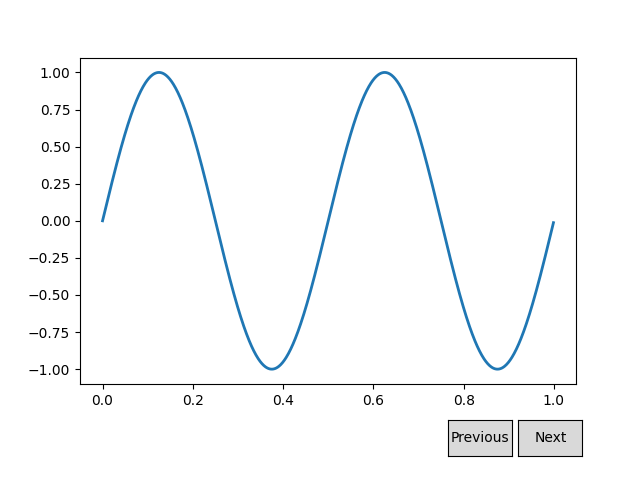

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = ax.plot(t, s, lw=2)


class Index:
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.075])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()